In [1]:
# Import common python libraries
import pandas as pd
import numpy as np

# Import functions from utils
from utils import save_fig
from utils import plot_dataset
from utils import naive_bayes
from utils import likelihood
from utils import posterior
from utils import classify

# Matplotlib for plotting figures
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# load the preprocessed iris dataset
dataset = pd.read_csv('datasets/marketing.csv', delimiter=',', header=0, names=["ID","Salary","Age","Purchase"])

print('\nNumber of records:',len(dataset))
print('\nclass domain:', dataset['Purchase'].unique())
print('\n\n',dataset.head())


Number of records: 10

class domain: [0 1]


    ID  Salary  Age  Purchase
0   1   53700   41         0
1   2   65300   37         0
2   3   48900   45         1
3   4   64800   49         1
4   5   44200   30         0


In [3]:
X = pd.DataFrame(dataset,columns=['Age','Salary']).values
y = dataset['Purchase'].values
print('The shape of X:',X.shape)
print('The shape of y:',y.shape)

The shape of X: (10, 2)
The shape of y: (10,)


Saving figure Ex4_Plot


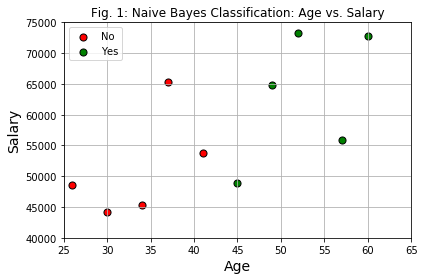

In [4]:
plt.figure(1)
plt.title('Fig. 1: Naive Bayes Classification: Age vs. Salary')
plot_dataset(X,y)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.axis([25,65,40000,75000])
plt.grid(True)
save_fig("Ex4_Plot")
plt.show()

In [5]:
parameters = naive_bayes(X, y)
print('\nclass 1 parameters:',parameters[0])
print('class 2 parameters:',parameters[1])
print('\nsigma 1:\n', np.diag(parameters[0]['var']))
print('sigma 2\n:', np.diag(parameters[1]['var']))


class 1 parameters: {'mean': array([3.360e+01, 5.142e+04]), 'var': array([2.74400e+01, 5.90776e+07]), 'prior': 0.5}
class 2 parameters: {'mean': array([5.260e+01, 6.312e+04]), 'var': array([2.90400e+01, 9.04936e+07]), 'prior': 0.5}

sigma 1:
 [[2.74400e+01 0.00000e+00]
 [0.00000e+00 5.90776e+07]]
sigma 2
: [[2.90400e+01 0.00000e+00]
 [0.00000e+00 9.04936e+07]]


In [6]:
Xtest = np.array([[35, 56000]])
likelihood1 = likelihood(Xtest, parameters[0]["mean"], parameters[0]["var"])
print('\nLikelihood for class 1:',likelihood1[0])
likelihood2 = likelihood(Xtest, parameters[1]["mean"], parameters[1]["var"])
print('Likelihood for class 2:',likelihood2[0])


Likelihood for class 1: 3.1937778888855082e-06
Likelihood for class 2: 1.1327395046152636e-08


In [7]:
posteriors = posterior(Xtest, parameters,np.unique(y))
print('\nThe posterior probability for class 1:',posteriors[0][0])
print('The posterior probability for class 2:',posteriors[1][0])


The posterior probability for class 1: 1.5968889444427541e-06
The posterior probability for class 2: 5.663697523076318e-09


In [8]:
print("\nNaive Bayes classifier:",classify(np.unique(y),posteriors))


Naive Bayes classifier: Don`t Contact Customer!


Saving figure NB_TestExample


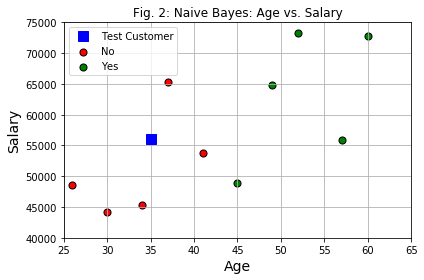

In [9]:
plt.figure(2)
plt.title('Fig. 2: Naive Bayes: Age vs. Salary')
plot_dataset(X,y)
plt.plot(Xtest[0,0], Xtest[0,1],'s', color='blue', markersize=10, label="Test Customer")
plt.xlabel("Age", fontsize=14)
plt.ylabel("Salary", fontsize=14)
plt.axis([25,65,40000,75000])
plt.grid(True)
plt.legend()
save_fig("NB_TestExample")
plt.show()